<h1>Zebrafish Embryo Energetics</h1>

In [65]:
####LOAD DATA HERE
import pandas as pd
data= pd.read_csv('data/335C_combined.csv') ##load file that is in directory 'data'
data.head()

,time,y150628,y150703,y150910,y150913,y150915,y150916,y150917,y150921,y150922,y150923
0,1,11.240423,11.085212,10.738853,10.779680,10.800126,10.844465,10.835734,10.770735,10.767771,10.731048
1,2,11.241147,11.084801,10.739540,10.779285,10.799950,10.844732,10.836566,10.770911,10.768112,10.730794
2,3,11.241405,11.084589,10.739913,10.778836,10.799792,10.845338,10.836654,10.770673,10.767991,10.730299
3,4,11.241813,11.084963,10.739793,10.779755,10.800435,10.846021,10.836864,10.770616,10.767938,10.731093
4,5,11.242237,11.085158,10.739793,10.778989,10.800739,10.846145,10.836776,10.770948,10.768035,10.730606


In [66]:
#import libraries, setup
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

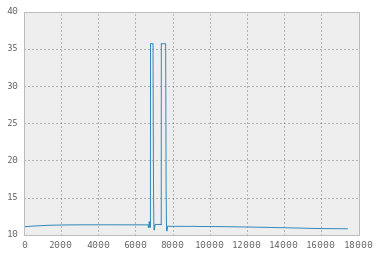

In [75]:
#choose dataset from dataframe
# x = data['time'].values
# y = data['y150701'].values
x = data['time']
y = data['y150703']
plt.plot(x,y)

<class 'pandas.core.series.Series'>


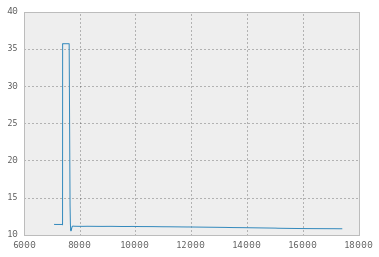

In [69]:
xt = x[7100:]
yt = y[7100:]
print type(xt)
plt.plot(xt,yt)

In [76]:
##Here we edit the time series to get beginning of time series correct 
#(not necessary always; can do by hand; doesn't always work)
m = np.argmax(y[7100:])
yin_av = np.mean(y[7100:7100 + (m-7100)/2])
z = y[m:]
z1 = pd.rolling_mean(z, 150)
# type(z1)
# print(z)
# print(z1[~np.isnan(z1)])
# print(yin_av)
k1 = argrelextrema(z1.values,np.less)[0] #local minima
print(k1)
y = yin_av-y[m+k1[6]:]
xs = x[m+k1[6]:]

[ 152  182  185  194  202  430  755  757  773  779 1055 1461 1503 1524 1528
 1742 1751 1757 2267 2288 2297 2310 2313 2320 2403 3000 3016 3037 3040 3043
 3045 3056 3067 3081 3093 3105 3112 3818 5363 8994 9229 9288 9451 9975]


In [34]:
##Here we edit the time series to get beginning of time series correct 
#(not necessary always; can do by hand; doesn't always work)
m = np.argmax(y)
yin_av = np.mean(y[:m/2])
z = y[m:]
z1 = pd.rolling_mean(z, 150)
#print(max(z1))
k1 = argrelextrema(z1.values,np.less)[0] #local minima
print(k1)
# y = yin_av-y[m+k1[0]:]
# xs = x[m+k1[0]:]

[]


Now we'll plot some the time series:

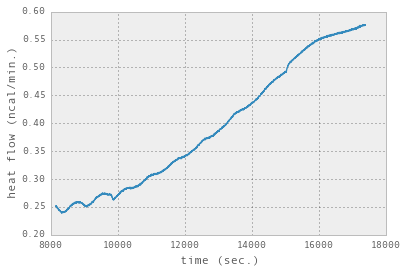

In [77]:
plt.plot(xs,y)
plt.xlabel('time (sec.)')
plt.ylabel('heat flow (ncal/min.)')

Now we'll plot some the time series with a polynomial fit:

In [ ]:
s1 = y[~np.isnan(y)]
xs = range(0,len(s1))
#plt.plot(xs,s1)
f = np.polyfit(xs, s1, 10)
p = np.poly1d(f)
plt.plot(xs,s1,'-',xs,p(xs),'r-')
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
plt.xlabel('time (sec.)')
plt.ylabel('heat flow (ncal/min.)')

Plot the oscillatory component (by subtracting the polynomial fit):

In [ ]:
osc = s1 - p(xs)
plt.plot(xs,osc)
plt.xlabel('time (sec.)')
plt.ylabel('normalized oscillatory component')

Now we plot the power spectral density:

In [ ]:
#https://plot.ly/matplotlib/fft/
Fs = 1
n = len(osc) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/float(T) # two sides frequency range
frq = frq[range(n/2)] # one side frequency range
Y = np.fft.fft(osc)/n # fft computing and normalization
Y = Y[range(n/2)]
plt.plot(1/frq,abs(Y),'r') # plotting the spectrum
print 'dominant period is =' + str(1/frq[np.argmax(abs(Y))]) + 'sec'
plt.xlabel('time (sec.)')
plt.ylabel('power')

In [ ]:
np.shape([x.values , y.values])
[x.values , y.values]

In [ ]:
df = pd.DataFrame.from_items([('time (sec.)', x.values[0:len(y.values)]), ('heat (ncal/min.)', y.values)])

In [ ]:
plt.plot(df['heat (ncal/min.)'])

In [ ]:
df.head()

In [ ]:
df.to_csv('zf_heat_JR.csv' , index = False)

- getting all datasets working;
- deal w/ NAs in data

